## Install all the required packages first

In [1]:
#install.packages('IRkernel') 
# install.packages("rlang", type="binary",dependencies = TRUE)
# install.packages("magrittr", type="binary",dependencies = TRUE) # package installations are only needed the first time you use it
# install.packages("dplyr", type="binary",dependencies = TRUE)    # alternative installation of the %>%
# install.packages("tidyquant", type="binary",dependencies = TRUE)
# install.packages("lubridate", type="binary",dependencies = TRUE)
# install.packages("PerformanceAnalytics", type="binary",dependencies = TRUE)
# install.packages("xts", type="binary",dependencies = TRUE)
# install.packages("ggplot2", type="binary",dependencies = TRUE)
# install.packages("broom", type="binary",dependencies = TRUE)
# install.packages("tidyverse", type="binary",dependencies = TRUE)
# install.packages('timetk', type="binary",dependencies = TRUE)

In [2]:
# remove.packages("rlang")
# install.packages("magrittr") # package installations are only needed the first time you use it
# install.packages("dplyr")    # alternative installation of the %>%
# install.packages("tidyquant")
# install.packages("lubridate")
# install.packages("PerformanceAnalytics")
# install.packages("xts")
# install.packages("ggplot2")
# install.packages("broom")
# install.packages("tidyverse")
# install.packages("timetk")

## load the required packages

In [4]:
# library(rlang)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(ggplot2)
library(dplyr)    # alternatively, this also loads %>%
library(tidyquant)
library(tidyverse)
library(lubridate)
library(PerformanceAnalytics)
library(xts)
library(timetk)

## Function to evalute the portfolio return based on the indecies and corresponding weights

In [5]:
portfolio_return <- function(Indecies, wts){
    stock_prices <- tq_get(Indecies , get  = "stock.prices")
    stock_returns_monthly <- stock_prices %>% group_by(symbol) %>% tq_transmute(select = adjusted,mutate_fun = periodReturn, period     = "monthly", col_rename = "Ra")
    portfolio_returns_monthly <- stock_returns_monthly %>% tq_portfolio(assets_col  = symbol, returns_col = Ra, weights = wts, col_rename  = "Ra")
    return(portfolio_returns_monthly)
}

## Function to plot the return, and estimate cumulative return, and current investment

In [6]:
portfolio_cum_return <- function(portfolio_returns_monthly, Initial_investment, Rf){
    portfolio_returns_monthly<- portfolio_returns_monthly[order(portfolio_returns_monthly$date),]
    #create an xts dataset  
    All.dat <- xts(portfolio_returns_monthly[,-1], order.by = portfolio_returns_monthly$date) 
    #Calculate Compound Return for the fund across all the data  
    Return.cumulative(All.dat$Ra,geometric = TRUE) 
    cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
    p.plot <- chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
    current_investment = Initial_investment * (1+cum_ret) 
    # Sharpe <- SharpeRatio(All.dat$Ra, All.dat$Risk.Free)
    Sharpe <- SharpeRatio(All.dat$Ra, Rf)
    return(c(p.plot, cum_ret, current_investment, Sharpe[1,]))
}

In [7]:
Initial_investment = 10000
Rf = 0 # e.g. (0.01/12)

# Factor-based Strategy

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 2.11694

[[3]]
[1] 31169.4

[[4]]
[1] 0.2806637


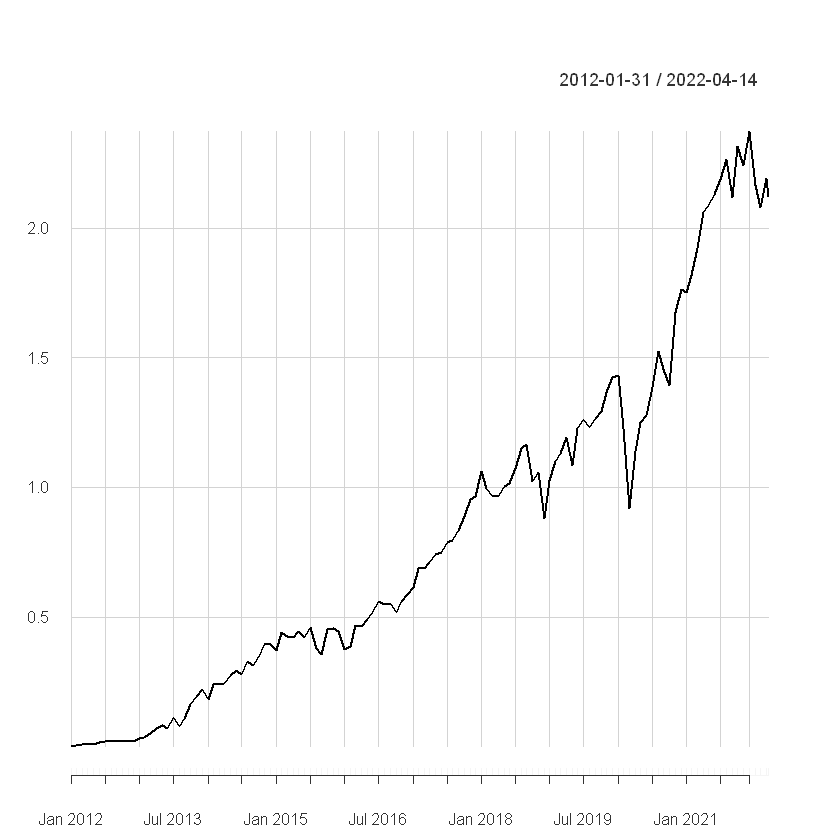

In [8]:
Indecies <- c("SIZE","VLUE","MTUM","USMV","QUAL")
wts <- c(0.2, 0.2, 0.2, 0.2, 0.2)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

[[1]]

[[2]]
[1] 0.9970374

[[3]]
[1] 19970.37

[[4]]
[1] 0.2137134


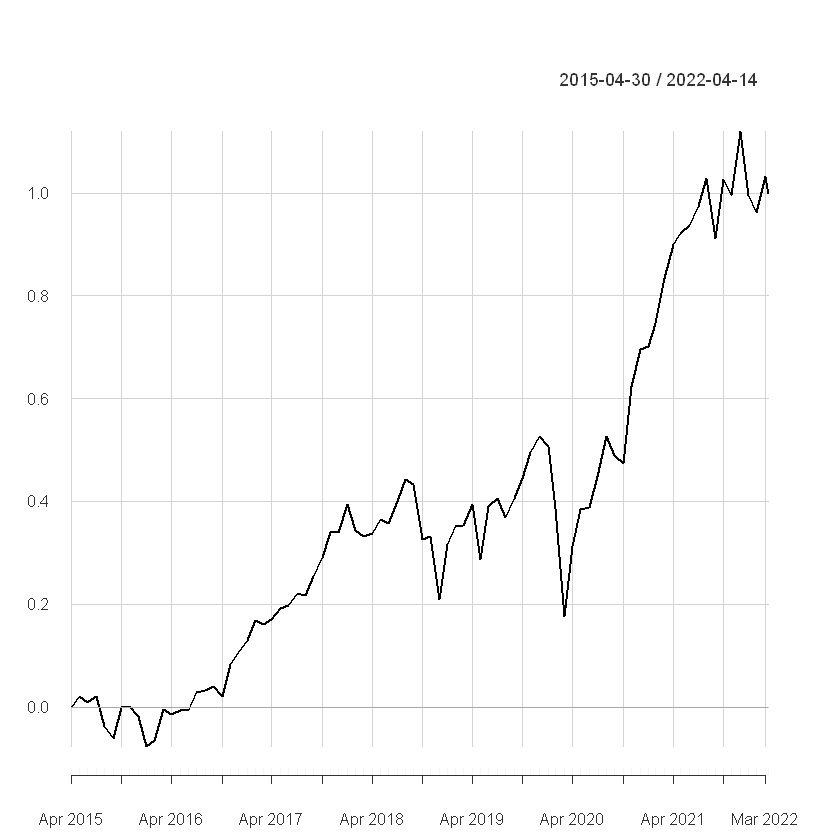

In [9]:
# combination of quality, value, size, and momentum
Indecies <- c("LRGF")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

[[1]]

[[2]]
[1] 2.564487

[[3]]
[1] 35644.87

[[4]]
[1] 0.3403592


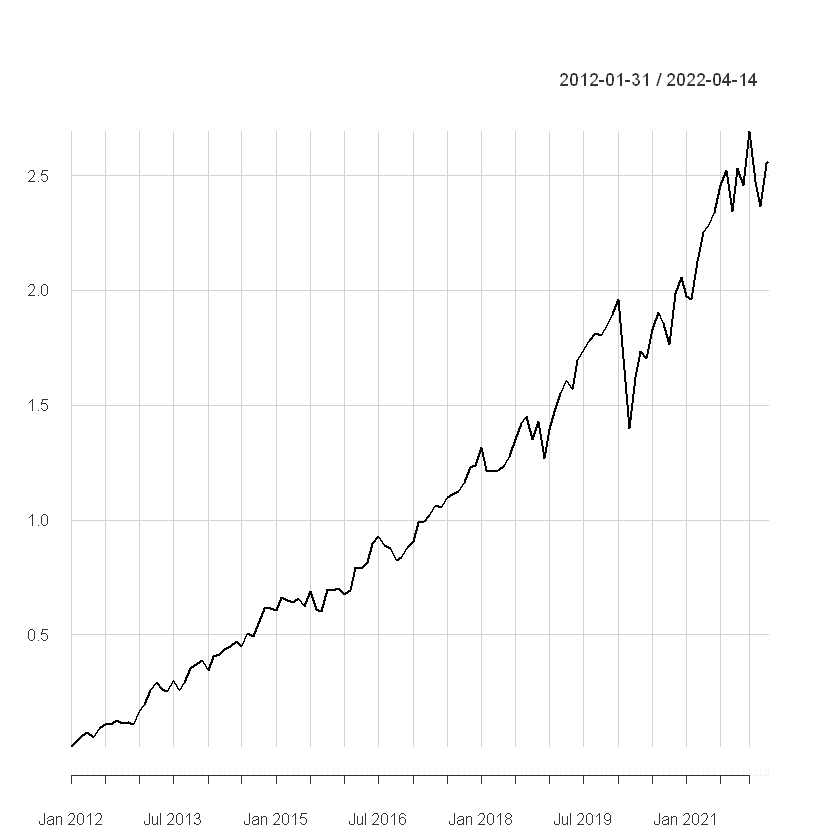

In [10]:
# only minimum volatility
Indecies <- c("USMV")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

# Barbell Strategy

### Allocation  #1

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 2.271236

[[3]]
[1] 32712.36

[[4]]
[1] 0.3080872


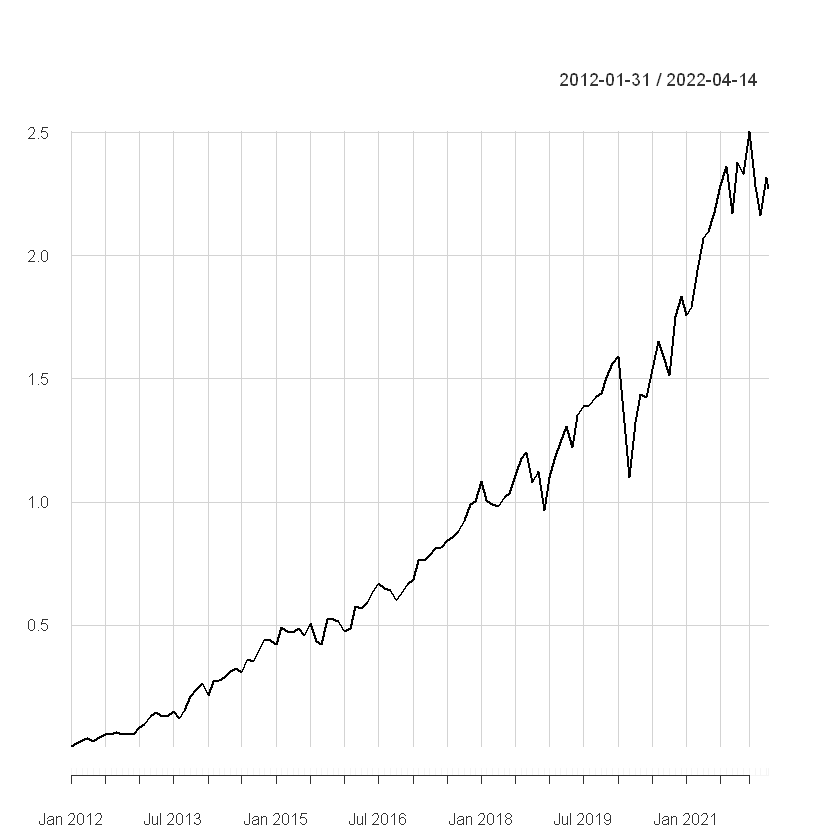

In [11]:
Indecies <- c("USMV","QUAL")
wts <- c(0.5, 0.5)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

### Allocation  #2

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 1.051819

[[3]]
[1] 20518.19

[[4]]
[1] 0.265934


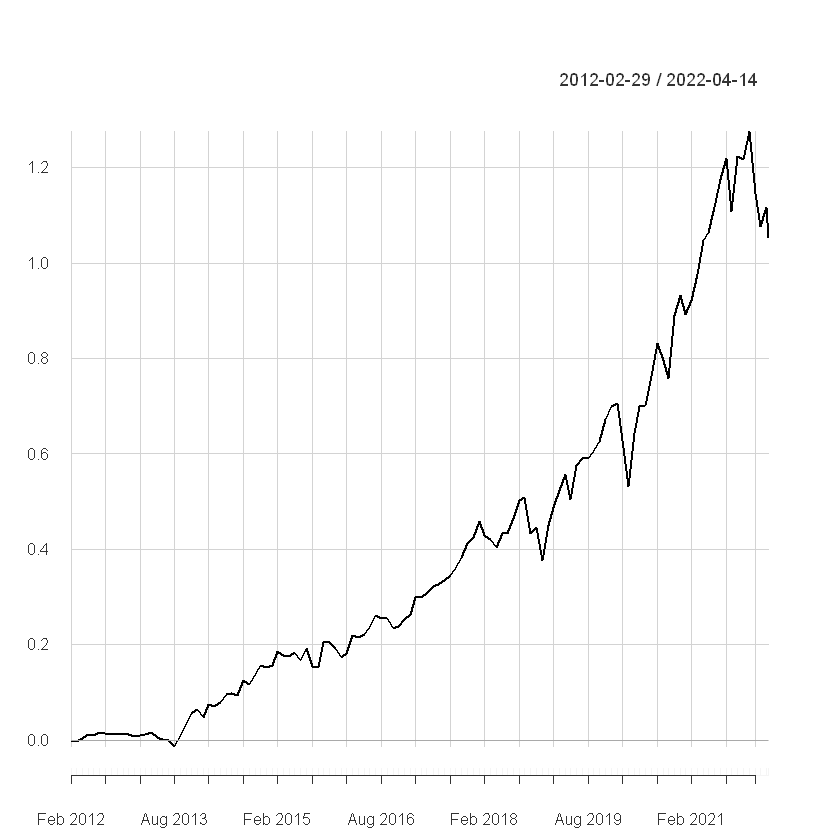

In [12]:
Indecies <- c("GOVT","QUAL")
wts <- c(0.5, 0.5)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 1.265158

[[3]]
[1] 22651.58

[[4]]
[1] 0.2606827


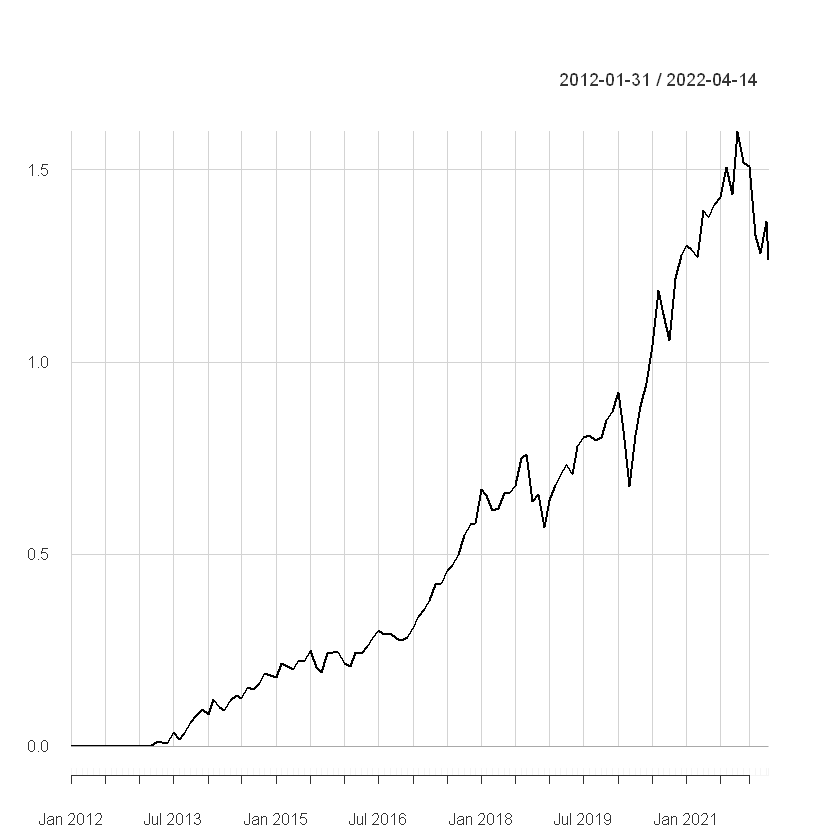

In [13]:
# SHV is ishares short treasury bond etf
Indecies <- c("SHV","MTUM")
wts <- c(0.5, 0.5)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

### Allocation  #3

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 10.24934

[[3]]
[1] 112493.4

[[4]]
[1] 0.3242483


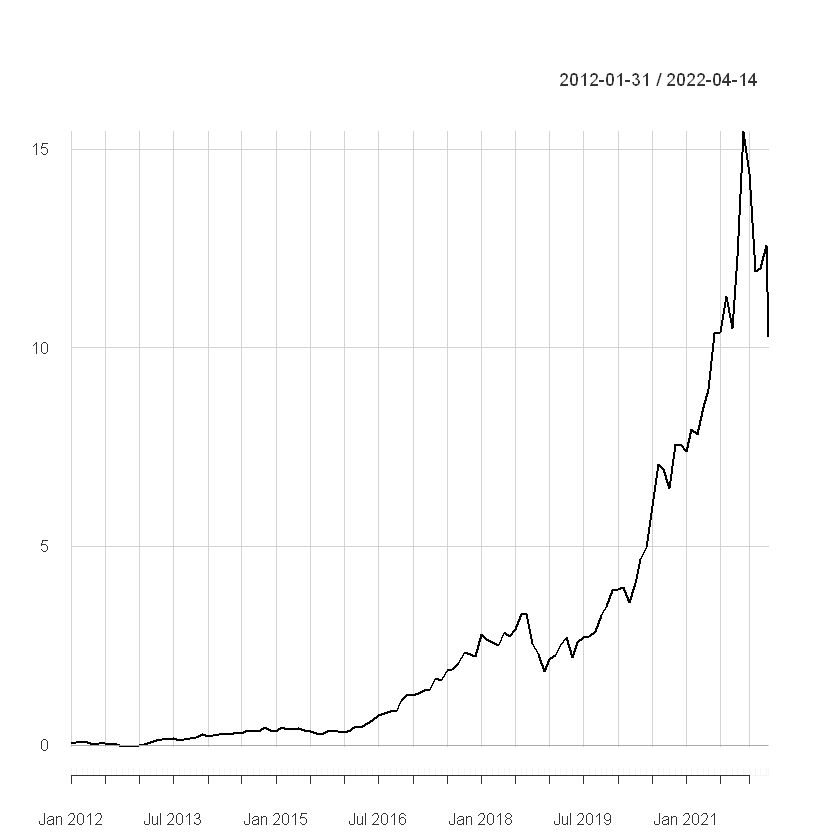

In [14]:
# https://www.marketwatch.com/story/here-are-the-most-and-least-volatile-stocks-among-the-sp-500-2019-01-29
# Most volatile stocks # verizon, walmart, Sysco Corp., Western Union Co., Coca-Cola Co.
# Least volatile stocks # Nvidia Corp., Lam Research Corp., AMD, Twitter Inc., Macy's Inc.
Indecies <- c("VZ","WMT","SYY","WU","KO","NVDA","LRCX","AMD","TWTR","M")
wts <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

### Allocation  #4

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 13.91552

[[3]]
[1] 149155.2

[[4]]
[1] 0.3666553


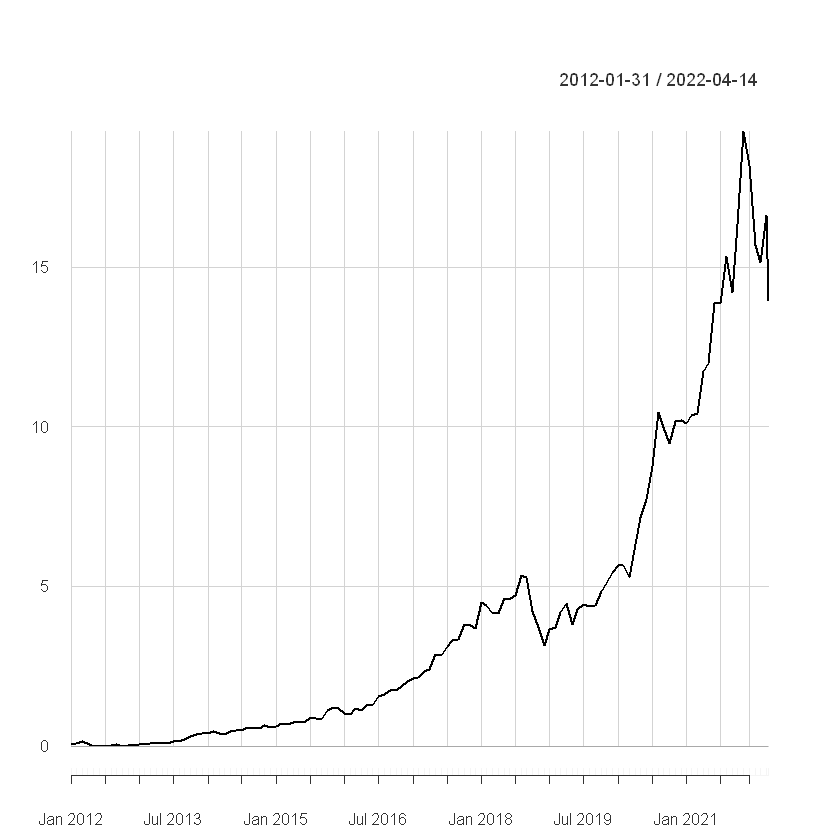

In [15]:
# Growth position
# housing, consumption, tech
Indecies <- c("TPX","AMZN","FWONK","GOOG","FB","AMT","NVDA","AAPL")
wts <- c(1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 2.041264

[[3]]
[1] 30412.64

[[4]]
[1] 0.2210588


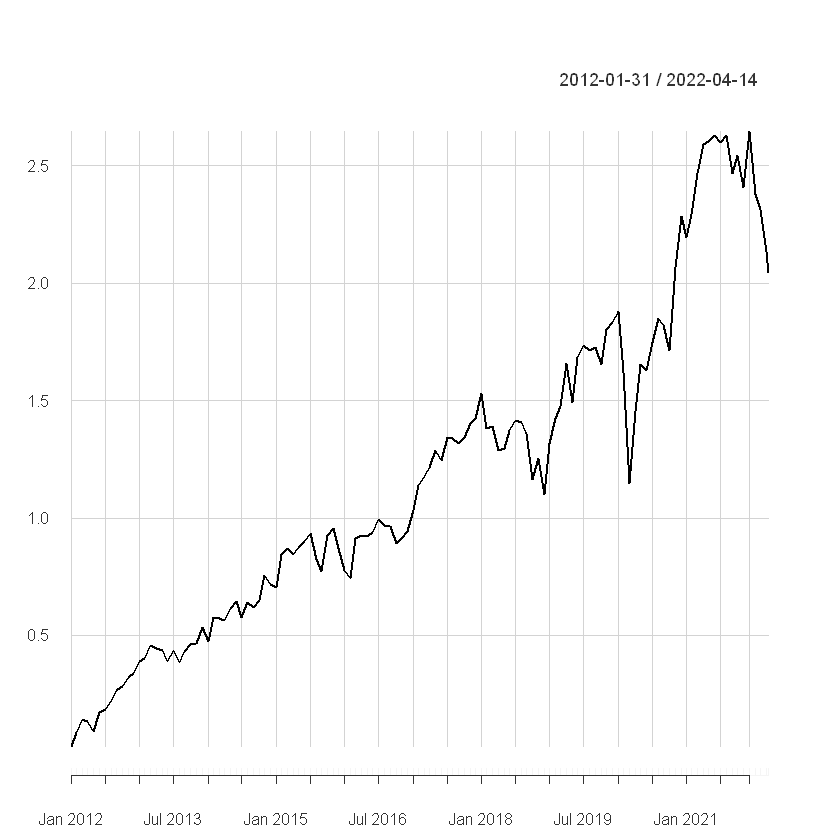

In [16]:
# value stock
# housing, consumption, tech
Indecies <- c("LEN","BUD","HEINY","FOX","DIS","ADI","LBRDA","BAX")
wts <- c(1/8,1/8,1/8,1/8,1/8,1/8,1/8,1/8)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 7.978394

[[3]]
[1] 89783.94

[[4]]
[1] 0.3495288


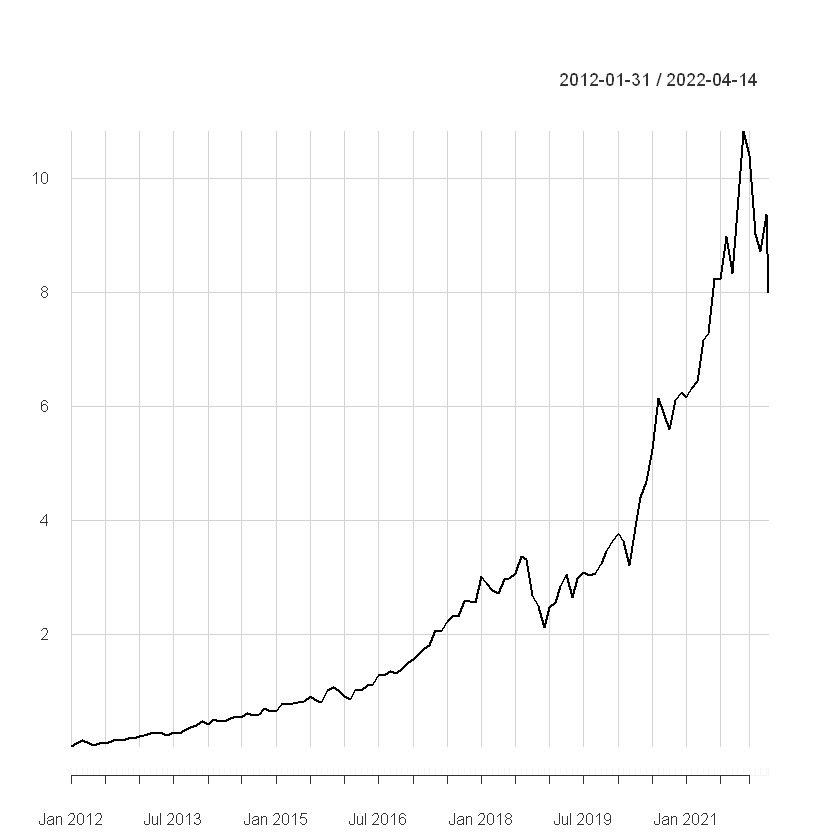

In [17]:
# Growth position & value stock
# housing, consumption, tech
Indecies <- c("LEN","BUD","HEINY","FOX","DIS","ADI","LBRDA","BAX", "TPX","AMZN","FWONK","GOOG","FB","AMT","NVDA","AAPL")
wts <- c(1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16,1/16)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

# SP500

[[1]]

[[2]]
[1] 3.171383

[[3]]
[1] 41713.83

[[4]]
[1] 0.3246186


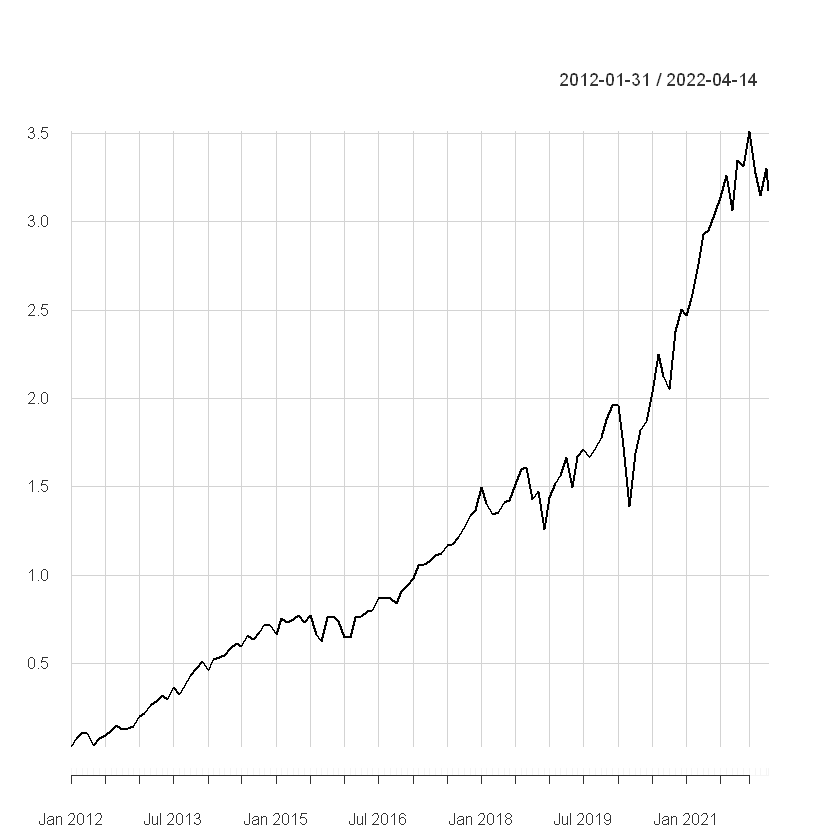

In [18]:
Indecies <- c("SPY")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

[[1]]

[[2]]
[1] 12.14338

[[3]]
[1] 131433.8

[[4]]
[1] 0.3034604


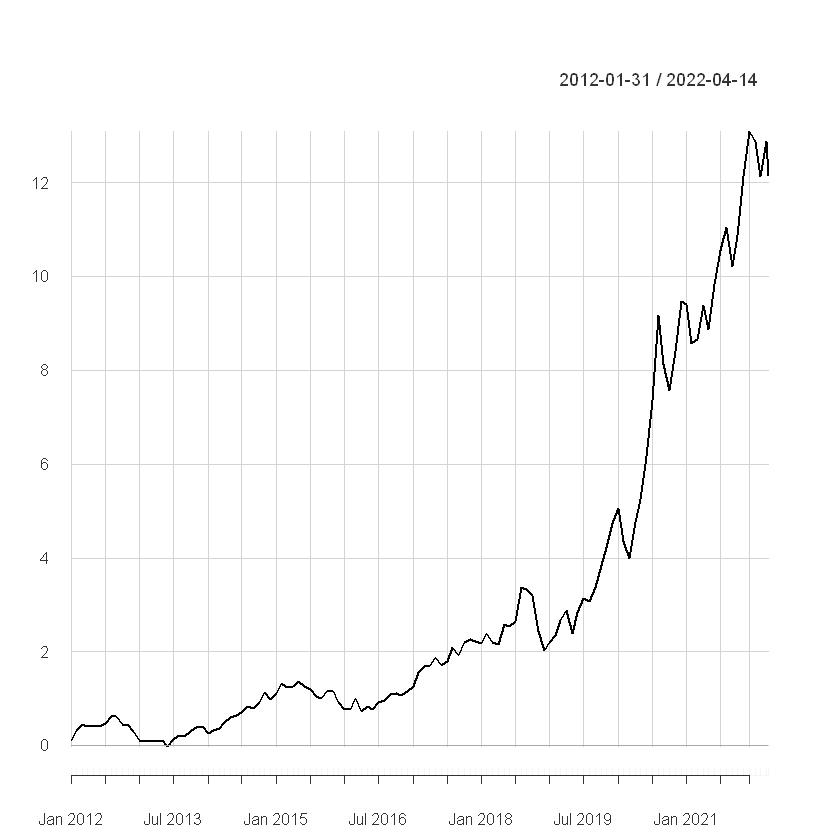

In [19]:
Indecies <- c("AAPL")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

[[1]]

[[2]]
[1] 174.3917

[[3]]
[1] 1753917

[[4]]
[1] 0.3111805


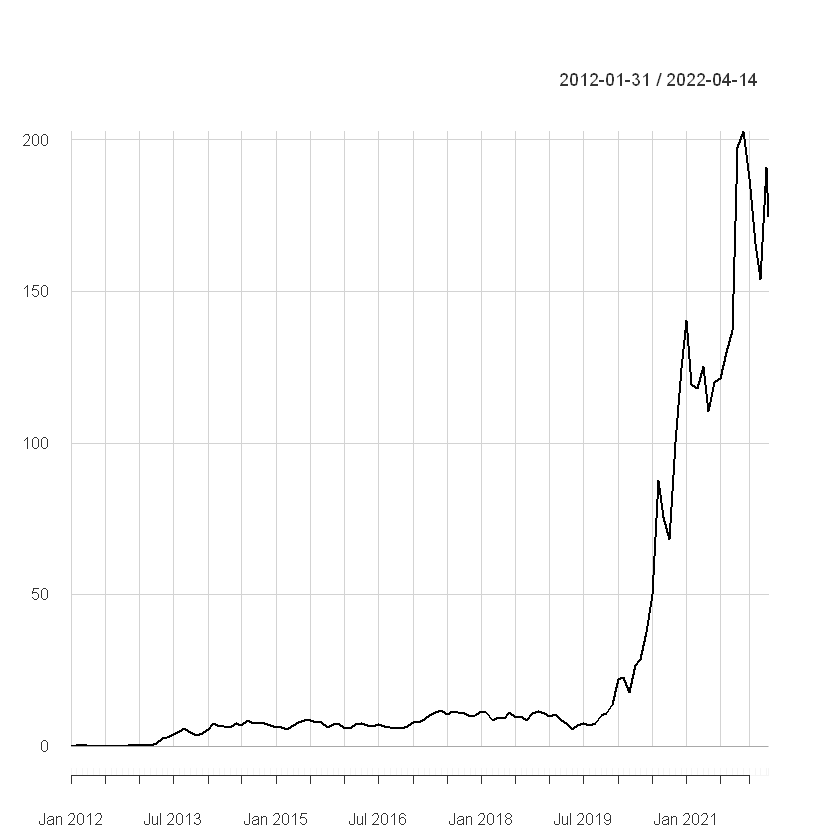

In [20]:
Indecies <- c("TSLA")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

[[1]]

[[2]]
[1] 6.678273

[[3]]
[1] 76782.73

[[4]]
[1] 0.2916781


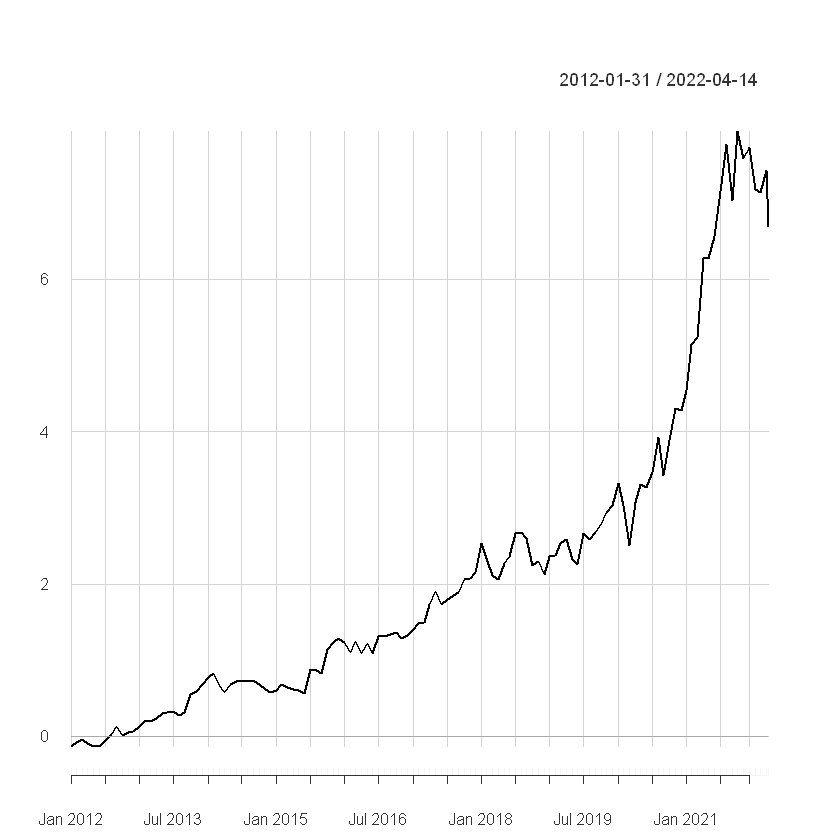

In [21]:
Indecies <- c("GOOG")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

[[1]]

[[2]]
[1] 15.94761

[[3]]
[1] 169476.1

[[4]]
[1] 0.3261362


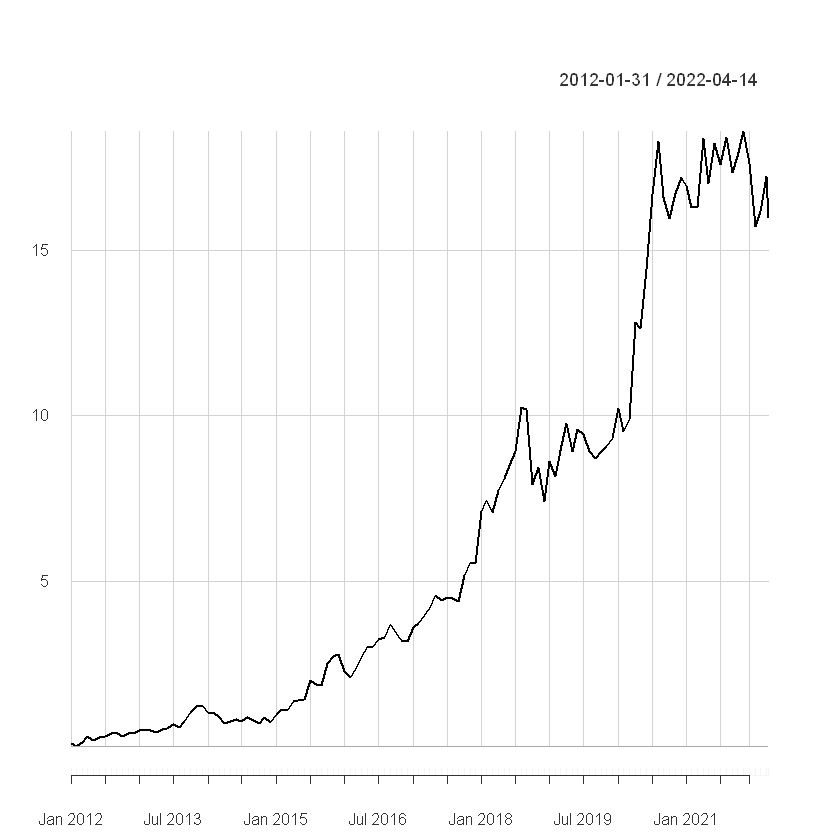

In [22]:
Indecies <- c("AMZN")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)